<a href="https://colab.research.google.com/github/zhulkhoirr/Steam-Recommendation-System/blob/main/SteamRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Rekomendasi Game Pada Platform Steam

## 1. Download Datasets Dari Kaggle

In [2]:
from google.colab import files
files.upload()

Saving users.csv to users.csv


{'users.csv': b'UserID,AppID,Playtime,Rating,IsRecommended\r\n2261676974623107,1238810,2.0,4,1\r\n2261676974623107,444200,2.0,4,1\r\n2261676974623107,242760,2.0,3,1\r\n2261676974623107,2668080,3.0,4,1\r\n2261676974623107,1222680,1.0,3,1\r\n5664458204981563,380600,321.0,5,1\r\n5664458204981563,2195250,141.0,5,1\r\n5664458204981563,1238810,35.0,5,1\r\n5664458204981563,730,367.0,5,1\r\n5664458204981563,431960,15.0,5,1\r\n6184540493100478,1997040,2.0,4,1\r\n6184540493100478,2139460,1.0,4,1\r\n6184540493100478,2641470,1.0,4,1\r\n6184540493100478,1085660,1.0,4,1\r\n44604,367500,150.0,5,1\r\n44604,1110910,50.0,4,1\r\n44604,287700,70.0,5,1\r\n44604,1222680,20.0,4,1\r\n44604,570,50.0,3,0\r\n2720041923748264,1086940,392.0,5,1\r\n2720041923748264,1085660,1.0,5,1\r\n2720041923748264,2074920,274.0,3,0\r\n2720041923748264,1286830,179.0,4,1\r\n2720041923748264,1774580,51.0,4,1\r\n6002629767287009,255710,149.0,5,1\r\n6002629767287009,380600,249.0,4,0\r\n6002629767287009,414700,10.0,5,1\r\n600262976728

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d fronkongames/steam-games-dataset/

Dataset URL: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/versions/
License(s): MIT
 98% 207M/211M [00:02<00:00, 75.5MB/s]
100% 211M/211M [00:02<00:00, 86.0MB/s]


In [ ]:
!unzip -q model.zip

In [7]:
!unzip -q steam-games-dataset.zip

In [ ]:
import zipfile

zip_filename = 'steam-games-dataset.zip'
file_to_extract = 'games.json'
output_directory = '.'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extract(file_to_extract, output_directory)


## 2. Memahami Data

In [9]:
import numpy as np
import pandas as pd

In [10]:
recommendations_df = pd.read_csv('users.csv')

recommendations_df.sample(5)

UserID    AppID  Playtime  Rating  IsRecommended
282  4414328479033132  1293830      12.0       5              1
783  9077114954028756   552520       5.0       5              1
578  7838914297870428    21690      11.0       3              0
574             57156  1237950     100.0       5              1
330  1121936200268765   872790     511.0       5              1

In [30]:
column_names = [
    "AppID", "Name", "Release date", "Estimated owners", "Peak CCU",
    "Required age", "Price", "Discount", "DLC count", "About the game",
    "Supported languages", "Full audio languages", "Reviews", "Header image",
    "Website", "Support url", "Support email", "Windows", "Mac", "Linux",
    "Metacritic score", "Metacritic url", "User score", "Positive",
    "Negative", "Score rank", "Achievements", "Recommendations", "Notes",
    "Average playtime forever", "Average playtime two weeks",
    "Median playtime forever", "Median playtime two weeks", "Developers",
    "Publishers", "Categories", "Genres", "Tags", "Screenshots", "Movies"
]

games_df = pd.read_csv('games.csv', names=column_names, header=0, index_col=False)


selected_columns = [
    "AppID", "Name", "Release date", "Price", "About the game", "Developers", "Publishers", "Categories", "Genres", "Tags"
]

games_df = games_df[selected_columns]

games_df.sample(5)

AppID                        Name  Release date  Price  \
88538  2635350      United Penguin Kingdom   Mar 9, 2024  13.49   
76332  2468960               The Old House  Jul 27, 2023   0.59   
16268  1169870  Witch Loraine's Death Game  Oct 31, 2019   3.99   
73386  2405690       Sweet Forest Guardian  May 12, 2023   1.69   
15632   777200   KOEWOTAYORINI SP / 声之寄托SP  Feb 13, 2018   1.99   

                                          About the game  \
88538  Build your settlement and satisfy the needs of...   
76332  Old House is a horror game in the genre of poi...   
16268  Take on the role of Paxon, a novice witch hunt...   
73386  Sweet Forest Guardian－Is a card + real-time ta...   
15632  Escape by means of 'Voice'! The second install...   

                    Developers                 Publishers  \
88538  Turquoise Revival Games  GrabTheGames,UpgradePoint   
76332                    64x64                      64x64   
16268        Giordano Pacifico          Giordano Pacifico   
73386                King Kong           King Kong Gaming   
15632                     あみそ組  Pujia8 Studio,Gamera Game   

                                              Categories  \
88538  Single-player,Steam Achievements,Steam Cloud,F...   
76332                                      Single-player   
16268                                      Single-player   
73386                   Single-player,Steam Achievements   
15632       Single-player,Steam Achievements,Steam Cloud   

                                 Genres  \
88538         Indie,Simulation,Strategy   
76332                             Indie   
16268               Adventure,Indie,RPG   
73386  Casual,Indie,Simulation,Strategy   
15632               Adventure,Indie,RPG   

                                                    Tags  
88538  Strategy,City Builder,Survival,Management,Reso...  
76332  2D,Point & Click,Minimalist,Pixel Graphics,Atm...  
16268                                RPG,Adventure,Indie  
73386                                                NaN  
15632  Adventure,Anime,Indie,RPG,Visual Novel,Puzzle,...

In [12]:
len(games_df)

97410

In [ ]:
import json
import pandas as pd

def restructure_json(data):
    new_data = {"root": []}
    for app_id, app_info in data.items():
        app_info["app_id"] = int(app_id)
        new_data["root"].append(app_info)
    return new_data

input_file_path = 'games.json'
output_json_path = 'fix_games.json'
output_csv_path = 'fix_games.csv'

with open(input_file_path, 'r') as file:
    data = json.load(file)

restructured_data = restructure_json(data)

with open(output_json_path, 'w') as file:
    json.dump(restructured_data, file, indent=4)

print(f"Data telah diproses dan disimpan ke {output_json_path}")

with open(output_json_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data["root"])

df.to_csv(output_csv_path, index=False)

print(f"Data telah disimpan dalam format CSV di {output_csv_path}")


In [13]:
# Cek kolom di recommendations_df
print("Kolom di recommendations_df:", recommendations_df.columns)

# Cek kolom di games_df
print("Kolom di games_df:", games_df.columns)


Kolom di recommendations_df: Index(['UserID', 'AppID', 'Playtime', 'Rating', 'IsRecommended'], dtype='object')
Kolom di games_df: Index(['AppID', 'Name', 'Release date', 'Price', 'About the game',
       'Developers', 'Publishers', 'Categories', 'Genres', 'Tags'],
      dtype='object')


In [14]:
user_with_games_df = pd.merge(recommendations_df, games_df, on='AppID', how='inner')

user_with_games_df.sample(5)

# selected_columns = ['app_id', 'title', 'rating', 'user_reviews', 'price_final', 'about_the_game', 'tags']

# games_with_metadata_df = games_with_metadata_df[selected_columns]

# games_with_metadata_df.sample(5)

UserID    AppID  Playtime  Rating  IsRecommended  \
126  1363125833236864  1245620     330.0       2              0   
428              2008      730       NaN       3              0   
275  3607470789433508  1049890      27.0       5              1   
4    2261676974623107  1222680       1.0       3              1   
151  7800778103469564      730      87.0       4              1   

                                 Name  Release date  Price  \
126                        ELDEN RING  Feb 24, 2022  59.99   
428  Counter-Strike: Global Offensive  Aug 21, 2012   0.00   
275               Little Witch Nobeta  Jun 23, 2020   9.99   
4                Need for Speed™ Heat   Jun 4, 2020  69.99   
151  Counter-Strike: Global Offensive  Aug 21, 2012   0.00   

                                        About the game  \
126  THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...   
428  Counter-Strike: Global Offensive (CS: GO) expa...   
275  The Little Witch Nobeta is a 3D action shootin...   
4    A thrilling race experience pits you against a...   
151  Counter-Strike: Global Offensive (CS: GO) expa...   

                          Developers  \
126                FromSoftware Inc.   
428  Valve,Hidden Path Entertainment   
275                     Pupuya Games   
4                        Ghost Games   
151  Valve,Hidden Path Entertainment   

                                       Publishers  \
126  FromSoftware Inc.,Bandai Namco Entertainment   
428                                         Valve   
275                    Pupuya Games,SimonCreative   
4                                 Electronic Arts   
151                                         Valve   

                                            Categories  \
126  Single-player,Multi-player,PvP,Online PvP,Co-o...   
428  Multi-player,Steam Achievements,Full controlle...   
275  Single-player,Steam Achievements,Full controll...   
4    Single-player,Multi-player,PvP,Online PvP,Co-o...   
151  Multi-player,Steam Achievements,Full controlle...   

                             Genres  \
126                      Action,RPG   
428             Action,Free to Play   
275       Action,Indie,Early Access   
4    Action,Adventure,Racing,Sports   
151             Action,Free to Play   

                                                  Tags  
126  Souls-like,Relaxing,Dark Fantasy,RPG,Difficult...  
428  FPS,Shooter,Multiplayer,Competitive,Action,Tea...  
275  Cute,Funny,Souls-like,Anime,Female Protagonist...  
4    Racing,Open World,Driving,Multiplayer,Action,A...  
151  FPS,Shooter,Multiplayer,Competitive,Action,Tea...

In [ ]:
user_with_games_df.to_csv('user_with_games.csv', index=False)

In [15]:
users_df = pd.read_csv('users.csv')

users_df.sample(5)

UserID    AppID  Playtime  Rating  IsRecommended
562  4480259751450879  2881650      87.0       5              1
340  8363941040935231  2202770      45.0       4              1
325  8058105540263487    42680      21.0       4              1
626  6642169635119715   273110       3.0       3              0
572             57156   271590     600.0       4              1

# Neural Collaborative Filtering

## 1. Mempersiapkan Data

In [16]:
hours_count = users_df[users_df['Playtime'] == 0.0].count()

print(f"Jumlah nilai 0.0 di kolom 'Playtime': {hours_count['Playtime']}")

Jumlah nilai 0.0 di kolom 'Playtime': 5


In [17]:
users_df = users_df[users_df['Playtime'] != 0.0]

In [18]:
zero_hours_count = (users_df['Playtime'] == 0.0).sum()

print(f"Jumlah nilai 0.0 di kolom 'Playtime': {zero_hours_count}")

Jumlah nilai 0.0 di kolom 'Playtime': 0


In [19]:
n_users = recommendations_df['UserID'].value_counts()
print(n_users)

UserID
2261676974623107    5
8567391577479044    5
3200680242905045    5
8740583150328598    5
4771673174553763    5
                   ..
4373                3
6862961407921381    3
1903504934664851    2
8032156113449658    2
4767028721037826    2
Name: count, Length: 165, dtype: int64


In [20]:
print("Jumlah duplikasi:",  users_df.duplicated().sum())

Jumlah duplikasi: 0


In [21]:
users_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi:",  users_df.duplicated().sum())

Jumlah duplikasi: 0


In [22]:
users_df.isnull().sum()

UserID            0
AppID             0
Playtime         11
Rating            0
IsRecommended     0
dtype: int64

In [23]:
users_df = users_df.fillna(0.1)

In [24]:
users_df.isnull().sum()

UserID           0
AppID            0
Playtime         0
Rating           0
IsRecommended    0
dtype: int64

In [25]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 804
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         800 non-null    int64  
 1   AppID          800 non-null    int64  
 2   Playtime       800 non-null    float64
 3   Rating         800 non-null    int64  
 4   IsRecommended  800 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 37.5 KB


## 2. Preprocessing Data

In [ ]:
users_df.head(5)

UserID    AppID  Playtime  Rating  IsRecommended
0  2261676974623107  1238810       2.0       4              1
1  2261676974623107   444200       2.0       4              1
2  2261676974623107   242760       2.0       3              1
3  2261676974623107  2668080       3.0       4              1
4  2261676974623107  1222680       1.0       3              1

In [26]:
user_ids = users_df['UserID'].unique().tolist()
user2user_encoded = {x:i for i, x in enumerate(user_ids)}
user_encoded2user = {i:x for i, x in enumerate(user_ids)}
users_df['user'] = users_df['UserID'].map(user2user_encoded)
n_users = len(user2user_encoded)

app_ids = users_df['AppID'].unique().tolist()
app2app_encoded = {x:i for i, x in enumerate(app_ids)}
app_encoded2app = {i:x for i, x in enumerate(app_ids)}
users_df['app'] = users_df['AppID'].map(app2app_encoded)
n_app  = len(app2app_encoded)

print("Jumlah user: {}, Jumlah game: {}".format(n_users, n_app))

Jumlah user: 165, Jumlah game: 343


In [ ]:
recommendations_df

UserID    AppID  Playtime  Rating  IsRecommended
0    2261676974623107  1238810       2.0       4              1
1    2261676974623107   444200       2.0       4              1
2    2261676974623107   242760       2.0       3              1
3    2261676974623107  2668080       3.0       4              1
4    2261676974623107  1222680       1.0       3              1
..                ...      ...       ...     ...            ...
800  2443289361417818   648800      60.0       4              0
801  4746043026050732  1259970       1.0       4              1
802  4746043026050732   945360       1.0       3              1
803  4746043026050732  1811260       1.0       3              1
804  4746043026050732  2000950       1.0       3              1

[805 rows x 5 columns]

In [ ]:
users_df = users_df.sample(frac=1, random_state=46)

X = users_df[['user', 'app']].values
y = users_df['IsRecommended']

In [ ]:
X

array([[ 95, 131],
       [ 85, 241],
       [  7,  31],
       ...,
       [ 74, 214],
       [111,  37],
       [ 38,  20]])

In [ ]:
y

474    1
426    1
36     1
265    1
260    1
      ..
403    1
442    0
372    1
553    1
189    1
Name: IsRecommended, Length: 800, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Train set is_recommended: {}".format(len(y_train)))
print("Test set is_recommended: {}".format(len(y_test)))

Train set is_recommended: 640
Test set is_recommended: 160


In [ ]:
X_train

array([[ 54, 170],
       [ 76,  13],
       [128, 308],
       ...,
       [ 79, 227],
       [ 56,   6],
       [ 35,  47]])

In [ ]:
X_train[:, 0]

array([ 54,  76, 128,  34, 160, 130, 142, 160, 140, 141,  94,  96,  58,
        48, 159,  27,  50, 107, 149,  79, 116, 123,  40, 114,  90,  22,
         1,  33, 105,  87,  76,  38, 116,  67,  30, 151, 136, 119,  98,
        21,  23, 158,  66, 125, 117,  47,  86,  46,  64, 111, 121, 117,
       163, 154, 108,  55,  79, 142,  54,  41, 101,  25,  97,  17, 123,
        60, 104, 118,  92, 143,  27, 163,  60,  59, 115,  60, 133,  64,
        23,  94, 104, 104, 109,  37,  53,   0,  92,  59,  32, 130, 117,
        94,  34,  20,  13,  22,  99,  32,  36,  53, 107,   3, 153, 115,
        62,  84, 118,  57,  83,   0,  75,  30, 127,  23, 156,  88, 153,
        83,  89, 128,  58, 154, 127,  18, 100,  94, 113, 107, 114,  67,
        89, 150,   5, 124, 137,  82, 128,  77,  51, 143, 157,  26,   4,
        37,  74,  47, 103,  19,  19,  52,  40,  42,   8, 110,  11, 158,
        47, 116,   7, 106,  59, 160,  44,   3,   9, 105,  47, 101,  36,
        80,  90,  77, 131,  87,  65, 148,  93,  88,  42,  87,  9

In [ ]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
X_train_array

[array([ 54,  76, 128,  34, 160, 130, 142, 160, 140, 141,  94,  96,  58,
         48, 159,  27,  50, 107, 149,  79, 116, 123,  40, 114,  90,  22,
          1,  33, 105,  87,  76,  38, 116,  67,  30, 151, 136, 119,  98,
         21,  23, 158,  66, 125, 117,  47,  86,  46,  64, 111, 121, 117,
        163, 154, 108,  55,  79, 142,  54,  41, 101,  25,  97,  17, 123,
         60, 104, 118,  92, 143,  27, 163,  60,  59, 115,  60, 133,  64,
         23,  94, 104, 104, 109,  37,  53,   0,  92,  59,  32, 130, 117,
         94,  34,  20,  13,  22,  99,  32,  36,  53, 107,   3, 153, 115,
         62,  84, 118,  57,  83,   0,  75,  30, 127,  23, 156,  88, 153,
         83,  89, 128,  58, 154, 127,  18, 100,  94, 113, 107, 114,  67,
         89, 150,   5, 124, 137,  82, 128,  77,  51, 143, 157,  26,   4,
         37,  74,  47, 103,  19,  19,  52,  40,  42,   8, 110,  11, 158,
         47, 116,   7, 106,  59, 160,  44,   3,   9, 105,  47, 101,  36,
         80,  90,  77, 131,  87,  65, 148,  93,  88

## 3. Membuat Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def rmse(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)
  return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

def RecommenderNet(n_users, n_app, embedding_size=16):
  user_input = Input(shape=(1,), name='user')
  user_embedding = Embedding(n_users, embedding_size, name='user_embedding')(user_input)
  app_input = Input(shape=(1,), name='app')
  app_embedding = Embedding(n_app, embedding_size, name='app_embedding')(app_input)

  concatenate = Concatenate(name='concatenate')([user_embedding, app_embedding])
  flatten = Flatten(name='flatten')(concatenate)

  dense = Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense')(flatten)
  batch_norm = BatchNormalization(name='batch_norm')(dense)
  dropout = Dropout(0.5, name='dropout')(batch_norm)

  dense_2 = Dense(32, activation='relu', kernel_regularizer=l2(0.001), name='dense_2')(dropout)
  batch_norm_2 = BatchNormalization(name='batch_norm_2')(dense_2)
  dropout_2 = Dropout(0.5, name='dropout_2')(batch_norm_2)
  output = Dense(1, activation='sigmoid', name='output')(dropout_2)

  model = Model([user_input, app_input], output)
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['mae', 'mse', rmse])

  return model

model = RecommenderNet(n_users, n_app)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app (InputLayer)          │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 16)          │          2,640 │ user[0][0]             │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app_embedding (Embedding) │ (None, 1, 16)          │          5,488 │ app[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1, 32)          │              0 │ user_embedding[0][0],  │
│                           │                        │                │ app_embedding[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 32)             │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          2,112 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_norm                │ (None, 64)             │            256 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ batch_norm[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_norm_2              │ (None, 32)             │            128 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32)             │              0 │ batch_norm_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             33 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
history = model.fit(
    x=X_train_array,
    y=y_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_test_array, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.0050 - mae: 0.4615 - mse: 0.3013 - rmse: 0.5404 - val_loss: 0.5389 - val_mae: 0.3447 - val_mse: 0.1361 - val_rmse: 0.3641
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8189 - mae: 0.4233 - mse: 0.2549 - rmse: 0.4984 - val_loss: 0.4590 - val_mae: 0.2501 - val_mse: 0.1073 - val_rmse: 0.3062
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6742 - mae: 0.3588 - mse: 0.1971 - rmse: 0.4337 - val_loss: 0.4467 - val_mae: 0.2039 - val_mse: 0.1043 - val_rmse: 0.2862
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6021 - mae: 0.3249 - mse: 0.1697 - rmse: 0.4023 - val_loss: 0.4503 - val_mae: 0.1844 - val_mse: 0.1051 - val_rmse: 0.2792
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5297 - mae: 0.2870 - mse: 0.1410 - rmse: 0.3633 - val_loss: 0.4505 - val_mae: 0.1734 - val_mse: 0.1050 - val_rmse: 0.2748
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4988 - mae: 0.2590 - mse: 0.12

In [ ]:
loss, mae, mse = model.evaluate(X_test_array, y_test)

print(f'Loss: {loss}, MAE: {mae}, MSE: {mse}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4686 - mae: 0.1899 - mse: 0.0942 
Loss: 0.4864014983177185, MAE: 0.1907648742198944, MSE: 0.1004653126001358


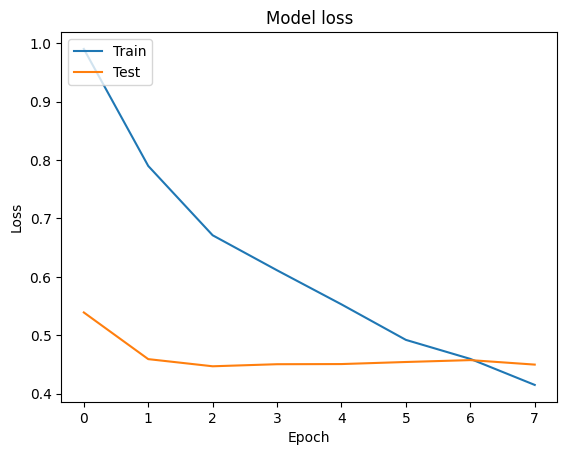

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('model/model.h5')

## 4. Prediksi Rekomendasi

In [ ]:
print('Pilih user random')

recommendation_per_user = users_df.groupby('UserID').size()

random_user =  recommendation_per_user[recommendation_per_user > 1].sample(1).index[0]

print(f'user_id: {random_user}')

Pilih user random
user_id: 4414328479033132


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model/model.h5')

print(f'Game yang direkomendasikan untuk user: {random_user}')
print('===' * 25)

game_played_by_user = users_df[users_df.UserID == random_user]
game_not_played_df = user_with_games_df[~user_with_games_df['AppID'].isin(game_played_by_user.AppID.values)]
game_not_played = list(set(game_not_played_df['AppID']).intersection(set(app2app_encoded.keys())))
game_not_played = [[app2app_encoded.get(x)] for x in game_not_played if x in app2app_encoded]

user_encoder = user2user_encoded.get(random_user)
user_game_array = np.hstack(([[user_encoder]] * len(game_not_played), game_not_played))
user_game_array = [user_game_array[:, 0], user_game_array[:, 1]]

recommendations = model.predict(user_game_array).flatten()
top_recommendations = (-recommendations).argsort()[:10]

recommended_games_ids = [app_encoded2app.get(game_not_played[top_recommendations[x]][0]) for x in range(len(top_recommendations)) if game_not_played[top_recommendations[x]][0] in app_encoded2app]

results = []
top_recommendations_ids = []

for index, AppID in enumerate(game_not_played):
  recommendation = recommendations[index]
  id_ = app_encoded2app.get(AppID[0])

  if id_ in recommended_games_ids:
    top_recommendations_ids.append(id_)
    try:
      condition = (user_with_games_df.AppID == id_)
      if user_with_games_df[condition].empty:
        print(f"No metadata found for game ID {id_}")
        continue

      name = user_with_games_df[condition]['Name'].values[0]
      release_date = user_with_games_df[condition]['Release date'].values[0]
      price = user_with_games_df[condition]['Price'].values[0]
      # price_final = user_with_games_df[condition]['price_final'].values[0]
      description = user_with_games_df[condition]['About the game'].values[0]
      developer = user_with_games_df[condition]['Developers'].values[0]
      publisher = user_with_games_df[condition]['Publishers'].values[0]
      category = user_with_games_df[condition]['Categories'].values[0]
      genre = user_with_games_df[condition]['Genres'].values[0]
      tags = user_with_games_df[condition]['Tags'].values[0]

      results.append({
        'Name': name,
        'Pred Recommendations': recommendation,
        'Release date': release_date,
        'Price': price,
        # 'price_final': price_final,
        'About the game': description,
        'Developer': developer,
        'Publisher': publisher,
        'Category': category,
        'Genre': genre,
        'Tags': tags
      })
    except Exception as e:
        print(f"Error processing game {id_}: {e}")
        continue

print("---" * 25)
print("> Top 10 game recommendations")
print("---" * 25)

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='Pred Recommendations', ascending=False)

results_df

Game yang direkomendasikan untuk user: 4414328479033132
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
---------------------------------------------------------------------------
> Top 10 game recommendations
---------------------------------------------------------------------------


Name  Pred Recommendations  Release date  \
6                  Sword of Convallaria              0.948385  Jul 31, 2024   
0                Dying Light: Bad Blood              0.942490  Sep 13, 2018   
4             STAR WARS Jedi: Survivor™              0.932856  Apr 27, 2023   
2         STAR WARS™: The Old Republic™              0.932189  Jul 21, 2020   
5                        Sea of Thieves              0.931941   Jun 3, 2020   
7                             Fall Guys              0.929359   Aug 3, 2020   
1                           Cry of Fear              0.928077  Apr 25, 2013   
9                      Wallpaper Engine              0.926166      Nov 2018   
3  METAL GEAR SOLID V: THE PHANTOM PAIN              0.922321   Sep 1, 2015   
8                  World of Tanks Blitz              0.920337   Nov 9, 2016   

   Price                                     About the game  \
6   0.00  PROFOUND STORY Journey through to Iria, a mine...   
0   0.00  Enter a zombie-infested area and compete as on...   
4  69.99  The story of Cal Kestis continues in Star Wars...   
2   0.00  STAR WARS™: The Old Republic™ is the only mass...   
5  39.99  About the Game Sea of Thieves offers the essen...   
7   0.00  You’re invited to dive and dodge your way to v...   
1   0.00  Cry of Fear is a psychological single-player a...   
9   3.99  Wallpaper Engine enables you to use live wallp...   
3  19.99  Konami Digital Entertainment continues forth t...   
8   0.00  Jump into a free-to-play MMO action shooter fe...   

                      Developer                     Publisher  \
6                            XD                            XD   
0                      Techland           Techland Publishing   
4                       Respawn               Electronic Arts   
2                       BioWare               Electronic Arts   
5                      Rare Ltd             Xbox Game Studios   
7                    Mediatonic                           NaN   
1              Team Psykskallar              Team Psykskallar   
9         Wallpaper Engine Team         Wallpaper Engine Team   
3  Konami Digital Entertainment  Konami Digital Entertainment   
8       Wargaming Group Limited       Wargaming Group Limited   

                                            Category  \
6  Single-player,Full controller support,In-App P...   
0  Multi-player,PvP,Online PvP,Full controller su...   
4  Single-player,Steam Achievements,Full controll...   
2  Multi-player,MMO,PvP,Co-op,Steam Achievements,...   
5  Multi-player,PvP,Online PvP,Co-op,Online Co-op...   
7  Multi-player,MMO,PvP,Online PvP,Co-op,Online C...   
1  Single-player,Multi-player,Co-op,Steam Cloud,V...   
9  Steam Achievements,Steam Trading Cards,Steam W...   
3  Single-player,Multi-player,Steam Achievements,...   
8  Multi-player,MMO,PvP,Online PvP,Co-op,Online C...   

                                               Genre  \
6                          RPG,Strategy,Free To Play   
0                            Action,RPG,Early Access   
4                                   Action,Adventure   
2             Free to Play,Massively Multiplayer,RPG   
5                                   Action,Adventure   
7   Action,Casual,Indie,Massively Multiplayer,Sports   
1                             Action,Adventure,Indie   
9  Casual,Indie,Animation & Modeling,Design & Ill...   
3                                   Action,Adventure   
8          Action,Free to Play,Massively Multiplayer   

                                                Tags  
6                                                NaN  
0  Action,RPG,Zombies,Battle Royale,Multiplayer,G...  
4  Action,Adventure,Souls-like,Singleplayer,Sci-f...  
2  Free to Play,Multiplayer,Character Customizati...  
5  Adventure,Multiplayer,Open World,Pirates,Co-op...  
7  Multiplayer,Party Game,Family Friendly,Battle ...  
1  Horror,Free to Play,Multiplayer,Co-op,Survival...  
9  Mature,Utilities,Software,Anime,Design & Illus...  
3  Stealth,Open World,Acti

# Cosine Similarity (Content-Based Filtering)

## Seleksi Fitur

In [32]:
print(games_df.columns)

Index(['AppID', 'Name', 'Release date', 'Price', 'About the game',
       'Developers', 'Publishers', 'Categories', 'Genres', 'Tags'],
      dtype='object')


In [34]:
selected_columns = ['Name', 'About the game', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags']

games_df = games_df[selected_columns]

In [43]:
games_df

Name  \
0            Galactic Bowling   
1                Train Bandit   
2                Jolt Project   
3                    Henosis™   
4       Two Weeks in Painland   
...                       ...   
97405  Femdom Game World: Mom   
97406             Blocky Farm   
97407    Infiltrate & Extract   
97408       Escape The Garage   
97409              Lober Lobe   

                                          About the game  \
0      Galactic Bowling is an exaggerated and stylize...   
1      THE LAW!! Looks to be a showdown atop a train....   
2      Jolt Project: The army now has a new robotics ...   
3      HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4      ABOUT THE GAME Play as a hacker who has arrang...   
...                                                  ...   
97405  . Femdom Game World - is a fascinating series ...   
97406  Enter the charming world of Blocky Farm where ...   
97407  Mission brief: You are deployed to a heavily g...   
97408  Welcome to Escape The Garage, the thrilling es...   
97409  Scan Brain Lobes Organize &amp; clear dangerou...   

                        Developers                       Publishers  \
0            Perpetual FX Creative            Perpetual FX Creative   
1                     Rusty Moyher                     Wild Rooster   
2                    Campião Games                    Campião Games   
3                Odd Critter Games                Odd Critter Games   
4                    Unusual Games                    Unusual Games   
...                            ...                              ...   
97405            Femdom Game World                Femdom Game World   
97406  Forever Entertainment S. A.      Forever Entertainment S. A.   
97407               Carlos Garrido  DigiPen Intsitute of Technology   
97408                       CryneX              CryneX,CryTechGames   
97409      James H. Van der Meulen              Trash Vomit Studios   

                                              Categories  \
0      Single-player,Multi-player,Steam Achievements,...   
1      Single-player,Steam Achievements,Full controll...   
2                                          Single-player   
3                  Single-player,Full controller support   
4                       Single-player,Steam Achievements   
...                                                  ...   
97405                       Single-player,Family Sharing   
97406  Single-player,Steam Achievements,Partial Contr...   
97407                                      Single-player   
97408    Single-player,Steam Achievements,Family Sharing   
97409  Single-player,Steam Achievements,Full controll...   

                                Genres  \
0                  Casual,Indie,Sports   
1                         Action,Indie   
2      Action,Adventure,Indie,Strategy   
3               Adventure,Casual,Indie   
4                      Adventure,Indie   
...                                ...   
97405                           Casual   
97406       Casual,Simulation,Strategy   
97407            Strategy,Free To Play   
97408           Adventure,Casual,Indie   
97409              Action,Casual,Indie   

                                                    Tags  
0                            Indie,Casual,Sports,Bowling  
1      Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...  
2                                                    NaN  
3      2D Platformer,Atmospheric,Surreal,Mystery,Puzz...  
4      Indie,Adventure,Nudity,Violent,Sexual Content,...  
...                                                  ...  
97405                                                NaN  
97406                                                NaN  
97407                                                NaN  
97408                                                NaN  
97409                                                NaN  

[97410 rows x 7 columns]

In [44]:
print(f"Isi datanya ada {games_df.shape[0]} baris, dan {games_df.shape[1]} kolom")

Isi datanya ada 97410 baris, dan 7 kolom


In [45]:
games_df.isnull().sum()

Name                  6
About the game     4870
Developers         4877
Publishers         5171
Categories         5913
Genres             4841
Tags              29763
dtype: int64

In [46]:
games_df.fillna('', inplace=True)

<ipython-input-46-10c8a3e27e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.fillna('', inplace=True)


In [47]:
features_combine = games_df['Name'] + ' ' + games_df['About the game'] + ' ' + games_df['Developers'] + ' ' + games_df['Publishers'] + ' ' + games_df['Categories'] + ' ' + games_df['Genres'] + ' ' + games_df['Tags']

features_combine

0        Galactic Bowling Galactic Bowling is an exagge...
1        Train Bandit THE LAW!! Looks to be a showdown ...
2        Jolt Project Jolt Project: The army now has a ...
3        Henosis™ HENOSIS™ is a mysterious 2D Platform ...
4        Two Weeks in Painland ABOUT THE GAME Play as a...
                               ...                        
97405    Femdom Game World: Mom . Femdom Game World - i...
97406    Blocky Farm Enter the charming world of Blocky...
97407    Infiltrate & Extract Mission brief: You are de...
97408    Escape The Garage Welcome to Escape The Garage...
97409    Lober Lobe Scan Brain Lobes Organize &amp; cle...
Length: 97410, dtype: object

In [48]:
print('Data type: {}'.format(type(features_combine)))

Data type: <class 'pandas.core.series.Series'>


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')

In [50]:
feature_vector = vectorizer.fit_transform(features_combine)

In [51]:
print(feature_vector)

  (0, 71607)	0.3750108016572667
  (0, 28489)	0.6470570499792798
  (0, 62505)	0.11056705303641921
  (0, 173828)	0.0490263220952049
  (0, 71900)	0.04994803791470379
  (0, 91328)	0.08324181636350164
  (0, 187240)	0.0642071848411847
  (0, 139225)	0.06525119613044794
  (0, 59643)	0.05838060700346057
  (0, 64878)	0.08229279156241795
  (0, 133222)	0.09627559145890627
  (0, 164391)	0.06881013907954986
  (0, 121232)	0.06608110853678605
  (0, 139206)	0.07948026468510236
  (0, 39893)	0.06460972109543296
  (0, 174018)	0.10624149022799625
  (0, 189472)	0.05944885643189766
  (0, 125262)	0.026529310762239047
  (0, 189539)	0.053150594994165114
  (0, 66359)	0.049598261338053964
  (0, 86345)	0.05960560992936291
  (0, 198450)	0.05957147660489593
  (0, 35274)	0.10718598551001804
  (0, 105326)	0.03200982935148003
  (0, 9011)	0.06173836554349465
  :	:
  (97409, 186737)	0.07924554301439284
  (97409, 49184)	0.09464118172503166
  (97409, 41118)	0.07319483875829651
  (97409, 142568)	0.18842258288587832
  (97409

In [52]:
print(vectorizer.vocabulary_)

{'galactic': 71607, 'bowling': 28489, 'exaggerated': 62505, 'stylized': 173828, 'game': 71900, 'intergalactic': 91328, 'twist': 187240, 'players': 139225, 'engage': 59643, 'fast': 64878, 'paced': 133222, 'single': 164391, 'multi': 121232, 'player': 139206, 'competition': 39893, 'submerged': 174018, 'unique': 189472, 'new': 125262, 'universe': 189539, 'filled': 66359, 'humor': 86345, 'wild': 198450, 'characters': 35274, 'levels': 105326, 'addictive': 9011, 'play': 139145, 'title': 182640, 'aimed': 10587, 'ages': 10137, 'skill': 165011, 'sets': 160967, 'accessible': 8310, 'intuitive': 91731, 'controls': 41239, 'allows': 12123, 'jump': 95698, 'right': 152595, 'action': 8765, 'campaign': 32223, 'online': 130542, 'allow': 12116, 'work': 199865, 'way': 196883, 'ranks': 147277, 'league': 104383, 'hours': 85698, 'minutes': 117373, 'entertaining': 60040, 'experience': 63100, 'leave': 104464, 'wanting': 196145, 'story': 172868, 'including': 89330, '11': 635, 'environments': 60261, 'modes': 11858

In [53]:
feature_vector.shape

(97410, 323270)

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

def batch_cosine_similarity(matrix, batch_size=5000):
    n_samples = matrix.shape[0]
    similarity_matrix = np.zeros((n_samples, n_samples))

    for start in range(0, n_samples, batch_size):
      end = min(start + batch_size, n_samples)
      batch = matrix[start:end]
      similarity_batch = cosine_similarity(batch)
      similarity_matrix[start:end, start:end] = similarity_batch

    return similarity_matrix

similarity_matrix = batch_cosine_similarity(feature_vector)

print(similarity_matrix)

[[1.         0.0525681  0.01138016 ... 0.         0.         0.        ]
 [0.0525681  1.         0.01518529 ... 0.         0.         0.        ]
 [0.01138016 0.01518529 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.02088909 0.03696506]
 [0.         0.         0.         ... 0.02088909 1.         0.0225203 ]
 [0.         0.         0.         ... 0.03696506 0.0225203  1.        ]]


In [55]:
similarity_matrix.shape

(97410, 97410)

## 3. Prediksi

In [74]:
input_game = input('Nama Game: ')

Nama Game: Rune Factory 3


In [75]:
list_game = games_df['Name'].tolist()
#print(list_game)

In [76]:
import difflib

find_close_match = difflib.get_close_matches(input_game, list_game)
print(find_close_match)

['Rune Factory 5', 'ReFactory', 'Rune Factory 3 Special']


In [77]:
close_match = find_close_match[0]
print(close_match)

Rune Factory 5


In [78]:
game_index = games_df[games_df['Name'] == close_match].index[0]
print(game_index)

44144


In [79]:
similarity_score = list(enumerate(similarity_matrix[game_index]))
sorted_similar_game = sorted(similarity_score, key=lambda x:x[1], reverse=True)
sorted_similar_game[0:20]

[(44144, 1.0000000000000002),
 (42059, 0.14569559633695117),
 (40032, 0.13918170515907072),
 (40801, 0.11843419425872155),
 (41399, 0.11763426338816235),
 (43597, 0.11055334001047737),
 (44069, 0.10370787601946665),
 (43947, 0.10008110455434452),
 (44604, 0.0976158227677869),
 (40735, 0.09705854229305022),
 (42990, 0.09369922666997621),
 (43919, 0.09343610121514756),
 (42315, 0.09283368056653898),
 (44221, 0.09234769400738986),
 (41148, 0.09073223327887212),
 (41208, 0.08557492052443048),
 (41754, 0.08428845858902424),
 (44534, 0.08362067306376583),
 (41392, 0.0834160790514595),
 (40041, 0.08120579886764988)]

In [80]:
print(f"Game yang direkomendasikan untuk {input_game}:\n")

i=1
for game in sorted_similar_game:
  index = game[0]
  title = games_df[games_df.index == index]['Name'].values[0]
  if (i<=20):
    print(f'{i}. {title}')
    i+=1

Game yang direkomendasikan untuk Rune Factory 3:

1. Rune Factory 5
2. Farming Village
3. Our Love Will Grow
4. World Seed Classic
5. DORAEMON  STORY OF SEASONS
6. Tiny-Tasy Town
7. Croppy Boy
8. Village Monsters
9. Survival Engine
10. World Seed
11. Grow: Song of the Evertree
12. RUNE II: Decapitation Edition
13. Jack the Barbarian
14. Monster Viator
15. Meu Mundo
16. Tales Across Time
17. Seed of Evil
18. Flower Shop: Winter In Fairbrook
19. Forge Squad
20. Fishing Adventure
